# Actividad 5-6 Modelos MA, ARMA y ARIMA

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
TempNY = pd.read_csv("TempNY.csv")
TempNY = TempNY[["Year", "Average"]]
TempNY = TempNY.set_index("Year")
TempNY

,Average
Year,
1870,53.60
1871,51.13
1872,50.98
1873,50.98
1874,51.34
...,...
2016,57.18
2017,56.22
2018,55.88


## 1. Determinar si los datos son estacionarios (Dickey - Fueller)

In [13]:
##Prueba Dickey-Fuller para los precios de apple
from statsmodels.tsa.stattools import adfuller

resultado_app = adfuller(TempNY)
print("El valor p de la prueba es: " + str(resultado_app[1]))
print("Se tiene un valor cercano a 1, por lo que se puede asumir que no es estacionaria")

El valor p de la prueba es: 0.841717253896537
Se tiene un valor cercano a 1, por lo que se puede asumir que no es estacionaria


In [14]:
## Aplicación de diferencias
TempNY["Temp-change"] = TempNY["Average"].diff()
TempNY = TempNY.dropna()
TempNY

,Average,Temp-change
Year,,
1871,51.13,-2.47
1872,50.98,-0.15
1873,50.98,0.00
1874,51.34,0.36
1875,49.43,-1.91
...,...,...
2016,57.18,0.53
2017,56.22,-0.96
2018,55.88,-0.34


In [15]:
##Prueba Dickey-Fuller para los precios de apple
from statsmodels.tsa.stattools import adfuller

resultado_app2 = adfuller(TempNY["Temp-change"])
print("El valor p de la prueba es: " + str(resultado_app2[1]))
print("Se tiene un valor alejado a 1, por lo que se puede asumir que la serie transformada es estacionaria")

El valor p de la prueba es: 8.361907414785971e-14
Se tiene un valor alejado a 1, por lo que se puede asumir que la serie transformada es estacionaria


<Axes: xlabel='Year'>

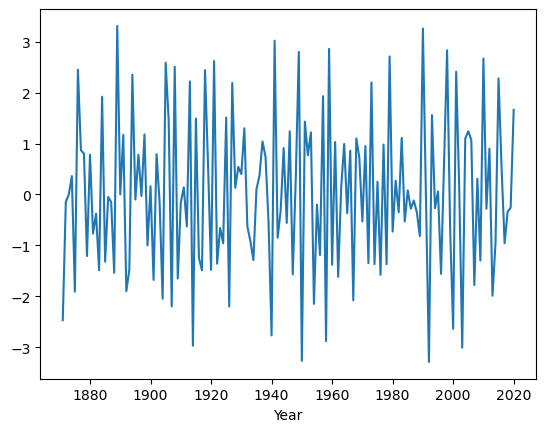

In [16]:
TempNY["Temp-change"].plot()

## Conclusión 
Al momento de usar los datos de las temperaturas naturales, la prueba de Dickey Fueller arrojó que los datos no eran estacionarios, por lo que no se podían utilizar. Después de aplicar la función de diferencias al promedio de temperaturas y volver a aplicar la evaluación, arrojó que los valores ya eran estacionarios, por lo que se pueden utilizar para los Modelos ARIMA.

In [17]:
## Definir grupo de entrenamiento y prueba
len_train = int(len(TempNY)*0.9)
print(len_train)
len_test = int(len(TempNY)*0.1)
print(len_test)

train = TempNY[0:len_train]
test = TempNY[len_train:]

135
15


## 2. Determinación de los parametros optimos 

<function matplotlib.pyplot.show(close=None, block=None)>

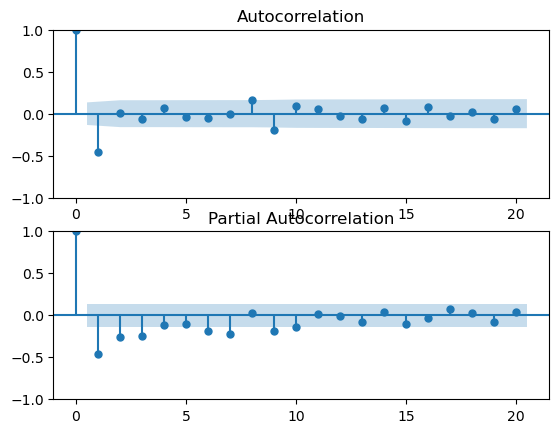

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2,1)
# Graficación de la función de autocorrelación ACF
plot_acf(TempNY["Temp-change"], lags=20, ax = axes[0], alpha = 0.1)

# Graficación de la función de autocorrelación parcial PACF
plot_pacf(TempNY["Temp-change"], lags=20, ax = axes[1], alpha = 0.1)

plt.show

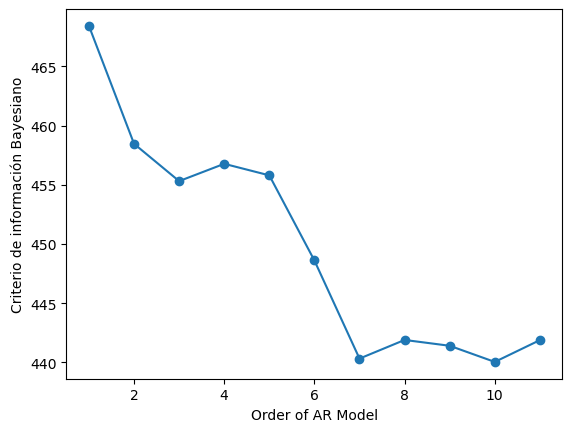

In [19]:
## Determinación del valor adecuado de P a partir del criterio de información Bayesiano (Akaiki)
from statsmodels.tsa.arima.model import ARIMA

AIC = np.zeros(12)
for p in range(12):
    mod_aic = ARIMA(train["Temp-change"], order=(p,0,0))
    res_aic = mod_aic.fit()
## Save BIC for AR(p)
    AIC[p] = res_aic.aic
    
# Grafico del BIC
plt.plot(range(1,12), AIC[1:12], marker="o")
plt.xlabel("Order of AR Model")
plt.ylabel("Criterio de información Bayesiano")
plt.show()

In [20]:
# Ajuste a un modelo (AR10) y valoración del indice Akaike 
from statsmodels.tsa.arima.model import ARIMA

mod_ar1 = ARIMA(train["Temp-change"], order = (10,0,0))
res_ar1 = mod_ar1.fit()
print("El AIC para AR(1) es: ", res_ar1.aic)

El AIC para AR(1) es:  440.0474954160867


## 3. Combinaciones de modelos ARIMA

In [21]:
# Ajuste a un modelo (ARIMA (10,1,1)) y valoración del indice Akaike 

mod_arima1 = ARIMA(train["Temp-change"], order = (10,1,1))
res_arima1 = mod_arima1.fit()
print("El AIC para ARIMA(10,1,1) es: ", res_arima1.aic)

El AIC para ARIMA(10,1,1) es:  446.2803317247368


In [22]:
# Ajuste a un modelo (ARIMA (10,1,4)) y valoración del indice Akaike 

mod_arima2 = ARIMA(train["Temp-change"], order = (10,1,4))
res_arima2 = mod_arima2.fit()
print("El AIC para ARIMA(10,1,4) es: ", res_arima2.aic)

El AIC para ARIMA(10,1,4) es:  449.5543893309219


In [23]:
# Ajuste a un modelo (ARIMA (10,1,7)) y valoración del indice Akaike 

mod_arima3 = ARIMA(train["Temp-change"], order = (10,1,7))
res_arima3 = mod_arima3.fit()
print("El AIC para ARIMA(10,1,7) es: ", res_arima3.aic)

El AIC para ARIMA(10,1,7) es:  441.3910247860191


In [24]:
# Ajuste a un modelo (ARIMA (7,1,1)) y valoración del indice Akaike 

mod_arima4 = ARIMA(train["Temp-change"], order = (7,1,1))
res_arima4 = mod_arima4.fit()
print("El AIC para ARIMA(7,1,1) es: ", res_arima4.aic)

El AIC para ARIMA(7,1,1) es:  446.1003131126502


In [25]:
# Ajuste a un modelo (ARIMA (7,1,4)) y valoración del indice Akaike 

mod_arima5 = ARIMA(train["Temp-change"], order = (7,1,4))
res_arima5 = mod_arima5.fit()
print("El AIC para ARIMA(7,1,4) es: ", res_arima5.aic)

El AIC para ARIMA(7,1,4) es:  440.98686045738305


In [26]:
# Ajuste a un modelo (ARIMA (7,1,7)) y valoración del indice Akaike 

mod_arima6 = ARIMA(train["Temp-change"], order = (7,1,7))
res_arima6 = mod_arima6.fit()
print("El AIC para ARIMA(7,1,7) es: ", res_arima6.aic)

El AIC para ARIMA(7,1,7) es:  437.414750743547


## Conclusión
Luego de determinar que los valores más optimos para Ar(p) eran el 10 y el 7, se empezaron a realizar varias combinaciones para encontrar la combinación más óptima, siendo el ARIMA(7,1,7) el que arrojó el valor más bajo de AIC (437.414), por lo que se considera como la combinación más optima.

## 4. Gráfico con los datos e intervalos

In [27]:
## Predicciones de los siguientes 5 años (ARIMA 7,1,7)
from statsmodels.graphics.tsaplots import plot_predict

mod2 = ARIMA(test["Average"], order = (7,1,7))
res2 = mod2.fit()
print(res2.summary())

                               SARIMAX Results                                
Dep. Variable:                Average   No. Observations:                   15
Model:                 ARIMA(7, 1, 7)   Log Likelihood                 -16.635
Date:                Thu, 24 Aug 2023   AIC                             63.271
Time:                        16:37:10   BIC                             72.857
Sample:                             0   HQIC                            62.384
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4571     30.203     -0.015      0.988     -59.654      58.740
ar.L2         -0.6618    124.324     -0.005      0.996    -244.332     243.008
ar.L3         -0.4189    230.789     -0.002      0.9

In [28]:
## Pronóstico puntual de las temperaturas con los intervalos al 90%
Pred2 = res2.forecast(len(test)+5)
conf2 = res2.get_forecast(len(test)+5).conf_int(alpha=0.1)
conf2 = conf2.reset_index()
conf2.drop(columns=["index"], inplace=True)

In [29]:
train = train.reset_index()
train = train[["Year", "Average"]]
train.index = train["Year"]
train.drop(columns=["Year"], inplace=True)

In [30]:
test = test.reset_index()
test2 = test[["Year", "Average"]]
test2.index = test2["Year"]
test2.drop(columns=["Year"], inplace=True)

In [31]:
## Creación del dataframe auxiliar con los 5 siguientes años
lista = test["Year"]
lista = pd.DataFrame(lista)
lista2 = np.array([[2021], [2022], [2023], [2024], [2025]])
lista2 = pd.DataFrame(lista2)
lista2.columns = ["Year"]
fechas = lista.append(lista2)
fechas = fechas.reset_index()
fechas.drop(columns=["index"], inplace=True)

In [32]:
## Creación del DataFrame con las predicciones por año

Pred2= pd.DataFrame(Pred2)
Pred2 = Pred2.reset_index() 
Pred2.drop(columns=["index"], inplace=True)
frames = [fechas, Pred2]
result = pd.concat(frames, axis=1, join = 'inner')
result.columns = ["Year", "Predicciones"]
result.index = result["Year"]
result.drop(columns=["Year"], inplace=True)

In [33]:
## Creación del Data Frame con los intervalos de las predicciones

frames2 = [fechas, conf2]
intervalos = pd.concat(frames2, axis=1, join="inner")
intervalos.index = intervalos["Year"]
intervalos.drop(columns=["Year"], inplace=True)

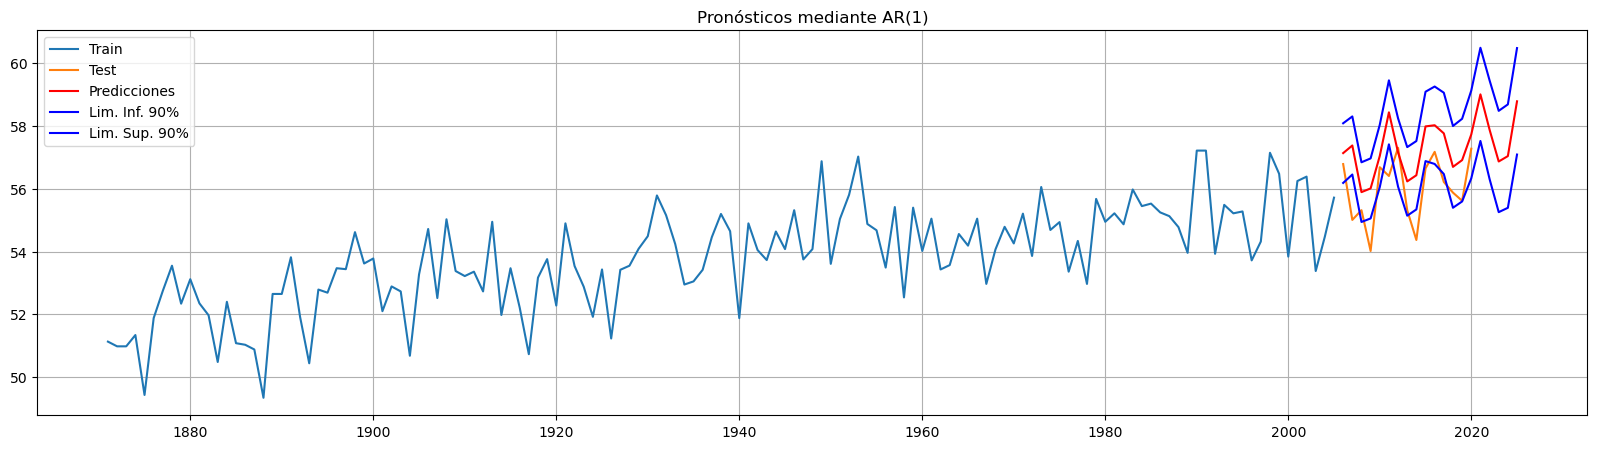

In [34]:
## Graficación de los datos

plt.figure(figsize=(20,5))
plt.grid() ## Cuadrícula
plt.plot(train, label = "Train")
plt.plot(test2, label = "Test")
plt.plot(result, label = "Predicciones", color = "red")
plt.plot(intervalos["lower Average"], label = "Lim. Inf. 90%", color = "blue")
plt.plot(intervalos["upper Average"], label = "Lim. Sup. 90%", color = "blue")
plt.legend(loc="best")
plt.title("Pronósticos mediante AR(1)")
plt.show()

In [35]:
## Creación del DataFrame de predicciones para cálculo de la bondad de ajuste
pred = res2.forecast(len(test))
pred = pd.DataFrame(pred)
pred = pred.reset_index()
pred.drop(columns=["index"], inplace=True)
frames3 = [lista, pred]
pred2 = pd.concat(frames3, axis=1, join = 'inner')
pred2.index = pred2["Year"]
pred2.drop(columns=["Year"], inplace=True)

In [36]:
## Cálculo de la bondad de ajuste

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test2, pred2)).round(2)
mape = np.round(np.mean(np.abs((test2["Average"] - pred2["predicted_mean"]) / test2["Average"]))*10, 2) 

print("RMSE = ", rmse, "MAPE = ", mape)

RMSE =  1.34 MAPE =  0.21


## Conclusión
Al momento de hacer las predicciones y realizar la gráfica, podemos apreciar que las predicciones respetan el patrón observado en los valores reales, sin embargo tuvieron diferencias con los valores reales, aunque la diferencia no fue muy significativa, lo cual al revisar la bondad de ajuste, podemos ver que el error medio es de 1.34 y el MAPE es de 0.21, por lo que podemos asegurar que las predicciones son buenas.